### Polymorphism
Enables objects of different derived classes to be accessed and processed using pointers or references to their base class type. This is achieved through virtual functions, allowing for dynamic method resolution based on the actual object type at runtime, not the pointer/reference type. Polymorphism is key in designing flexible and maintainable code.

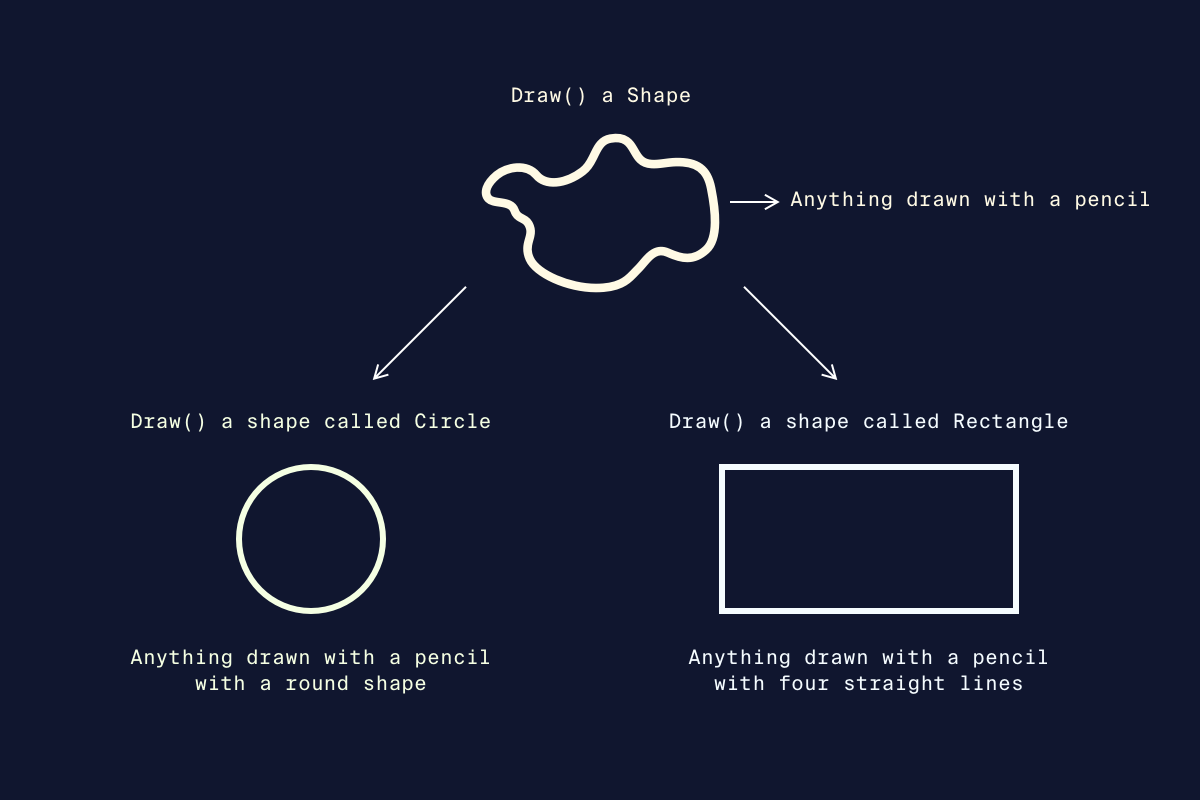

There are types of polymorphism:
- ***Compile-Time Polymorphism***: achieved through function overloading and operator overloading.
- ***Run-Time Polymorphism***: achieved through the use of virtual functions and inheritance. This is commonly associated with the concept of one interface, multiple functions

### Function Overloading
In C++, compile-time polymorphism is achieved through function overloading, allowing multiple functions to share a name but have different implementations. When called, the executed function implementation is determined by the function ***signature***. A function signature consists of the function name, the types of parameters, the number of parameters, and their order.

Example: `someFunction(int,char,int)`

Compile-time polymorphism chooses the correct function or operation when the code is compiled rather than when it is run, leading to efficient code execution.

In [ ]:
void display(int i) {   
  std::cout << "Displaying int: " << i << std::endl;   
}   

void display(double d) {   
  std::cout << "Displaying double: " << d << std::endl;   
}   

void display(std::string s) {   
  std::cout << "Displaying string: " << s << std::endl;   
} 

The output would vary based on which `display()` is called, eg with an integer or double or string.

### Virtual Functions
A virtual function in a base class allows derived classes to override it. This ensures that the correct function is called for an object, even when it is accessed through a pointer or a reference of the base class type, facilitating dynamic behavior. Note that the base class function must be declared with the keyword `virtual`.

### Inheritance Explained
In C++, inheritance allows a derived class to inherit characteristics from a base class. This supports polymorphism, enabling derived classes to override base class functions, thus allowing different implementations for shared interfaces. Polymorphic behavior is achieved via virtual functions, fostering code reusability and maintainability.

### C++ Upcasting Explained
In C++, upcasting occurs when a pointer or reference of a derived class type is cast to a base class type. It helps in achieving polymorphism by allowing access to overridden base class methods from derived class objects. This casting is implicit and safe when derived class pointers or references are used as base class pointers or references.

This concept is similar to saying that a duck, a pigeon, and a parrot are all types of birds. If we have 
classes representing these different kinds of birds—Duck, Pigeon, and Parrot—we can treat an instance of each class as if it were an instance of the Bird class. To do this in C++, we create a pointer to a Bird and assign it an object of any kind of bird subclass. Here is an example:

In [ ]:
class Bird {
public:
  void fly();

private:
  string name;

In [ ]:
class Duck : public Bird {
public:
  void walk();
};

Create an instance of the derived class `Duck` by creating it with the base `Bird` class as below:

In [ ]:
Bird* duckie = new Duck();

Since `Duck` inherits from `Bird`, it also inherits the fly() function. To access this function, we can use the member access operator (`->`).

In [ ]:
Bird* birdie = new Bird(); //pointer
birdie -> fly(); //allowed

However, because Duck has a walk() function but Bird does not, and since duckie is being treated as if it were a Bird, duckie does not have a walk() function. The following would cause a compiler error:

In [ ]:
duckie -> walk(); // Not allowed

// make sure to use delete operator when using new operator to release it 
delete duckie;

If you want to call a function from base class when you have created an instance of derived class, use `->` instead of `base.someFunction()`.

In [ ]:
int main() {
  Computer* myComputer = new Desktop("Dell", 3.7, 16);
  myComputer -> printSpecs();
  delete myComputer;
  return 0;
}

### C++ Downcasting
Downcasting in C++ allows you to convert a base class pointer to a derived class pointer. This is usually done when you know the object is of the derived type, but you only have access to it through a base class pointer. It’s performed using the `dynamic_cast operator`, ensuring type safety at runtime.

`DerivedClass* derivedClass = dynamic_cast<DerivedClass*>(baseClass);`
In the code, dynamic_cast attempts to convert the baseClass pointer (pointing to a base class object) back to a pointer of DerivedClass. If the cast is successful (baseClass originally points to an instance of DerivedClass), derivedClass will point to the derived class object, allowing access to members specific to DerivedClass. However, if baseClass does not point to an instance of DerivedClass (or an appropriate derived class), the dynamic_cast will return nullptr, signaling that the cast failed.

### C++ Virtual Destructors
In C++, virtual destructors are crucial in ensuring proper resource cleanup when dealing with polymorphism. Use virtual in the base class destructor to allow derived class destructors to execute correctly when objects are deleted via a base class pointer. This prevents resource leaks and undefined behaviors in your application.

- make the destructor in base class `virtual`
- define a destructor in derived class 
- when called in main, both destructors are called

Order of calls:
1. base constructor
2. derived class constructor
3. derived class destructor
4. base class destructor

### C++ `override` Keyword
The override keyword in C++ is used to ensure a member function is correctly overriding a virtual function from a base class. It triggers a compile-time error if there’s no matching function in the base class, providing a safety net for developers to avoid common mistakes.

Use the `override` keyword in a derived class like this: `double someFunction(int a) override;`

### Virtual Function Basics
Virtual functions are defined in a base class and allow derived classes to provide specific implementations. Declaring functions as virtual ensures that the correct method is called, even when handling objects through references or pointers to the base class. This plays a crucial role in runtime polymorphism. Replacing a base class method with a derived class method enhances flexibility.

First declare the function using the `virtual` keyword in the base class:
`virtual void someFunction(int a)`

In [ ]:
// BaseClass.hpp

class BaseClass{
public:
  virtual void someFunction(int); // overridden function
  void anotherFunction(int); // not an overridden function 

// Other class properties and function declarations
};

In [ ]:
// DerivedClass.hpp

class DerivedClass : public BaseClass{
public:
  void someFunction(int); // virtual not required
  void anotherFunction(int); // not an overridden function

// Other class properties and function declarations
};


Then provide a new definition of the overridden class in the cpp file of the derived class. 

The virtual keyword tells the compiler to wait until the function is called (during runtime) to select which definition to use. The definition will be based on which object is calling the function. This is known as runtime polymorphism.

When we work with an instance of an object through a pointer of its base class, the version of the function that is called is the one overridden in the derived class.

There is a drawback to using runtime polymorphism: more work has to be done at runtime to determine which function definition to invoke, possibly slowing down execution.